In [2]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [3]:
raw_dir = '../../data/downloaded_raw'
out_dir = '../../data/processed_dat'

sorted(os.listdir(raw_dir))

['2000census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2000census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 '2010census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2010census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 'M830202 - Divorce Rates, Annual.csv',
 'M830202 - Divorce Rates, Annual_cleaned.csv',
 'README.md',
 'agegroup_grooms_brides.csv',
 'agegroup_grooms_brides.ods',
 'death_rate_agespecific.csv',
 'death_rate_agespecific_cleaned.csv',
 'demographic_ethnicity.csv',
 'input_birth_fertility_rates_sin_1961-2018.csv',
 'input_birth_fertility_rates_sin_1961-2018_cleaned.csv',
 'input_birth_number_by_age_1980-2018.csv',
 'input_birth_number_by_order_sin_1967-2018.csv',
 'input_lifetable_sin_2003-2017.csv',
 'input_marriage_rates_sin_1980-2017.csv',
 'input_marriage_rates_sin_1980-2017_cleaned.csv',
 'input_marriage_rates_sin_1

In [4]:
df0_2000 = pd.read_csv(os.path.join(raw_dir, '2010census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv'))
df0_2000 = df0_2000.replace('-', 0)
numcol = ['Total', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
target_col = ['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
df0_2000 = df0_2000.astype({col: 'float' for col in numcol})
df0_2000#[numcol[0]].dtypes
df0_2000.dtypes

Family Structure        object
Household Structure     object
Total                  float64
1 Person               float64
2 Persons              float64
3 Persons              float64
4 Persons              float64
5 Persons              float64
6 Persons              float64
7 Persons              float64
8 Or More Persons      float64
dtype: object

In [6]:
total = float(df0_2000['Total'][0])

df1_2000 = df0_2000.copy()
for i in df0_2000.index:
    row = df0_2000.loc[i]
    for col in numcol:
        val = row[col]
        #if col=='Total': print(i, val/total)
        df1_2000.at[i, col] = float(val)/total
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.122064,0.187627,0.201891,0.230334,0.146601,0.068245,0.026928,0.016312
1,No Family Nucleus,Subtotal,0.170854,0.122064,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,No Family Nucleus,One Person,0.122064,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.048789,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
4,One Family Nucleus,Subtotal,0.762447,0.000000,0.153138,0.192878,0.217544,0.129533,0.050199,0.014244,0.004910
5,One Family Nucleus,One Generation,0.122516,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
8,Two Family Nuclei,Subtotal,0.063895,0.000000,0.000000,0.000000,0.009729,0.015842,0.017074,0.011906,0.009344
9,Two Family Nuclei,One Or Two Generations,0.016415,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745


In [7]:
temp = df1_2000[['Household Structure', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp.iat[-1,0] = 'Three Or More Family Nuclei'
temp = temp[temp['Household Structure']!='Subtotal']
temp = temp[temp['Household Structure']!='Total']
temp = temp.reset_index(drop=True)
print(temp['Household Structure'])
temp = temp[['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp

0                     One Person
1            Two Or More Persons
2                 One Generation
3                Two Generations
4      Three Or More Generations
5         One Or Two Generations
6      Three Or More Generations
7    Three Or More Family Nuclei
Name: Household Structure, dtype: object


,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
3,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
4,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
5,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745
6,0.000000,0.000000,0.000000,0.002743,0.010448,0.014753,0.010937,0.008600
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000317,0.000572,0.001915


In [8]:
temphs = ['$1P$',
 '$\geq 2P$',
 '$1G$',
 '$2G$',
 '$\geq 3G$',
 '$\leq 2G$',
 '$\geq 3G$', 
 '$\geq 3FN$']
len(temphs)

8

In [9]:
xs = temp.index.tolist()
ys = list(range(1,9))
print(xs, ys)
xxs = []
yys = []
zzs = []
for x in xs:
    for y in ys:
        xxs.append(x)
        yys.append(y)
        zzs.append(temp.iat[x,y-1]*1000)


[0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 3, 4, 5, 6, 7, 8]


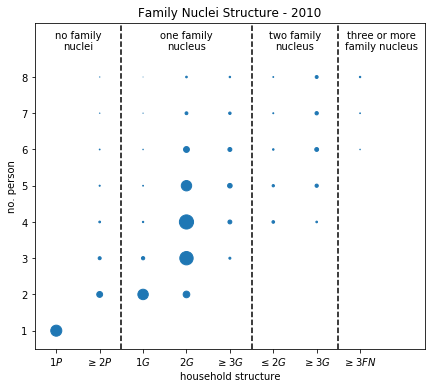

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(xxs, yys, s=zzs)
ax.set_xlim([-0.5,8.5])
ax.set_xticks(list(range(0,8)))
ax.set_xticklabels(temphs)
ax.axvline(x=1.5, ls='--', c='k')
ax.axvline(x=4.5, ls='--', c='k')
ax.axvline(x=6.5, ls='--', c='k')
ax.set_ylim([0.5,9.5])
ax.set_yticks(list(range(1,9)))
ax.annotate('no family\nnuclei', xy=(0.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('one family\nnucleus', xy=(3, 9), xycoords='data', ha='center', va='center')
ax.annotate('two family\nnucleus', xy=(5.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('three or more\nfamily nucleus', xy=(7.5, 9), xycoords='data', ha='center', va='center')
ax.set_ylabel('no. person')
ax.set_xlabel('household structure')
ax.set_title('Family Nuclei Structure - 2010')
plt.savefig('family_nuclei_2010.png', dpi=92, bbox_inches='tight')

# Family Structure

## No Family Nucleus

In [8]:
def make_dic(com):
    com2 = {}
    for gen, v in com.items():
        for cou, cs in v.items():
            com2[(gen, cou)] = {}
            for st in cs:
                com2[(gen, cou)][st] = 0.0
            if len(com2[(gen, cou)])==0:
                del com2[(gen, cou)]
    return com2

# Family Structure

## No Family Nucleus
def com_zero():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            k = 0 # k must be zero because young people must be dependent and attach to one (or two) parent(s)
            if (i+j+k<9) and (i+j+k>0):
                alist = [i,j,k]
                atuple = (i,j,k)
                c = sum(alist)
                if alist.count(0)==2:
                    comp['one'][c].append(atuple)
                elif alist.count(0)==1:
                    comp['two'][c].append(atuple)
    return make_dic(comp)

## One Family Nucleus
def com_one():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)

## Two Family Nuclei
def com_two():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=1: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)


## Three Or More Family Nuclei
def com_more():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=2: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)

## zero family nucleus

In [9]:
com = com_zero()
comp_zero = {}
for k,v in com.items():
    gen,cou = k
    if cou not in comp_zero: comp_zero[cou] = {}
    for k2,v2 in v.items():
        comp_zero[cou][k2] = v2
#comp_zero

In [10]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.122064,0.187627,0.201891,0.230334,0.146601,0.068245,0.026928,0.016312
1,No Family Nucleus,Subtotal,0.170854,0.122064,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,No Family Nucleus,One Person,0.122064,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.048789,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
4,One Family Nucleus,Subtotal,0.762447,0.000000,0.153138,0.192878,0.217544,0.129533,0.050199,0.014244,0.004910
5,One Family Nucleus,One Generation,0.122516,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
8,Two Family Nuclei,Subtotal,0.063895,0.000000,0.000000,0.000000,0.009729,0.015842,0.017074,0.011906,0.009344
9,Two Family Nuclei,One Or Two Generations,0.016415,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745


In [11]:
df1_2000_zero = df1_2000[df1_2000['Family Structure']=='No Family Nucleus']
df1_2000_zero = df1_2000_zero[df1_2000_zero['Household Structure']=='Subtotal']
prop_2000_zero = df1_2000_zero[target_col].T[1].to_dict()
prop_2000_zero2 = {}
for k,v in prop_2000_zero.items():
    prop_2000_zero2[int(k[0])] = v
prop_2000_zero2

{1: 0.1220643674951131,
 2: 0.0344884459648143,
 3: 0.00901284557386205,
 4: 0.0030604230661826306,
 5: 0.0012260890812622173,
 6: 0.0006553686121195197,
 7: 0.00020507539793353813,
 8: 0.00014137112538397095}

In [12]:
for k, v in prop_2000_zero2.items():
    com_size = comp_zero[k]
    #print(k, len(com_size))
    div = v/float(len(com_size))
    for k2,v2 in comp_zero[k].items():
        comp_zero[k][k2]+=div
#comp_zero

In [13]:
comp_zero_2 = {}
for k,v in comp_zero.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_zero_2): comp_zero_2[k2] = 0
        comp_zero_2[k2]+=v2
comp_zero_2

{(0, 1, 0): 0.06103218374755655,
 (1, 0, 0): 0.06103218374755655,
 (0, 2, 0): 0.0114961486549381,
 (2, 0, 0): 0.0114961486549381,
 (1, 1, 0): 0.0114961486549381,
 (0, 3, 0): 0.0022532113934655125,
 (3, 0, 0): 0.0022532113934655125,
 (1, 2, 0): 0.0022532113934655125,
 (2, 1, 0): 0.0022532113934655125,
 (0, 4, 0): 0.0006120846132365262,
 (4, 0, 0): 0.0006120846132365262,
 (1, 3, 0): 0.0006120846132365262,
 (2, 2, 0): 0.0006120846132365262,
 (3, 1, 0): 0.0006120846132365262,
 (0, 5, 0): 0.00020434818021036955,
 (5, 0, 0): 0.00020434818021036955,
 (1, 4, 0): 0.00020434818021036955,
 (2, 3, 0): 0.00020434818021036955,
 (3, 2, 0): 0.00020434818021036955,
 (4, 1, 0): 0.00020434818021036955,
 (0, 6, 0): 9.362408744564568e-05,
 (6, 0, 0): 9.362408744564568e-05,
 (1, 5, 0): 9.362408744564568e-05,
 (2, 4, 0): 9.362408744564568e-05,
 (3, 3, 0): 9.362408744564568e-05,
 (4, 2, 0): 9.362408744564568e-05,
 (5, 1, 0): 9.362408744564568e-05,
 (0, 7, 0): 2.5634424741692266e-05,
 (7, 0, 0): 2.563442474169

## one family nucleus

In [14]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.122064,0.187627,0.201891,0.230334,0.146601,0.068245,0.026928,0.016312
1,No Family Nucleus,Subtotal,0.170854,0.122064,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,No Family Nucleus,One Person,0.122064,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.048789,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
4,One Family Nucleus,Subtotal,0.762447,0.000000,0.153138,0.192878,0.217544,0.129533,0.050199,0.014244,0.004910
5,One Family Nucleus,One Generation,0.122516,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
8,Two Family Nuclei,Subtotal,0.063895,0.000000,0.000000,0.000000,0.009729,0.015842,0.017074,0.011906,0.009344
9,Two Family Nuclei,One Or Two Generations,0.016415,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745


In [15]:
df1_2000_onefn = df1_2000[df1_2000['Family Structure']=='One Family Nucleus']
df1_2000_onefn = df1_2000_onefn[df1_2000_onefn['Household Structure']!='Subtotal']
df1_2000_onefn


,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
5,One Family Nucleus,One Generation,0.122516,0.0,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.0,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.0,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141


In [16]:
df1_2000_onefn2 = df1_2000_onefn.set_index('Household Structure')
df1_2000_onefn2 = df1_2000_onefn2[target_col]
onefn_dic1 = df1_2000_onefn2.to_dict(orient='index')
onefn_dic2 = {}
for k,v in onefn_dic1.items():
    kk = k.split(' ')[0].lower()
    onefn_dic2[kk] = {}
    for k2, v2 in v.items():
        kk2 = k2.split(' ')[0]
        onefn_dic2[kk][kk2] = v2
onefn_dic2

{'one': {'1': 0.0,
  '2': 0.10895088662384808,
  '3': 0.010612433677743647,
  '4': 0.0018142627757609605,
  '5': 0.0006798031276179838,
  '6': 0.00029408684724937167,
  '7': 0.000120427254956716,
  '8': 4.3633063390114495e-05},
 'two': {'1': 0.0,
  '2': 0.044187203295168946,
  '3': 0.178120636693661,
  '4': 0.20062046216140741,
  '5': 0.10790805640882435,
  '6': 0.034255445406311084,
  '7': 0.00805989946942195,
  '8': 0.002727066461882156},
 'three': {'1': 0.0,
  '2': 0.0,
  '3': 0.004145141022060877,
  '4': 0.015109257190728847,
  '5': 0.02094474308852276,
  '6': 0.015649434515498464,
  '7': 0.006064123149958112,
  '8': 0.002140638089919017}}

In [17]:
comp_onefn = com_one()
#comp_onefn
for gen_cou, v in comp_onefn.items():
    gen, cou = gen_cou
    csize = float(len(v))
    prop = onefn_dic2[gen][str(cou)]
    #print(gen, cou, csize, prop)
    div = prop/csize
    for k in v.keys():
        #print(k)
        comp_onefn[(gen, cou)][k]+=div
    #break
#comp_onefn

In [18]:
comp_one_2 = {}
for k,v in comp_onefn.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_one_2): comp_one_2[k2] = 0
        comp_one_2[k2]+=v2
comp_one_2

{(0, 2, 0): 0.05447544331192404,
 (2, 0, 0): 0.05447544331192404,
 (0, 3, 0): 0.0053062168388718235,
 (3, 0, 0): 0.0053062168388718235,
 (0, 4, 0): 0.0009071313878804803,
 (4, 0, 0): 0.0009071313878804803,
 (0, 5, 0): 0.0003399015638089919,
 (5, 0, 0): 0.0003399015638089919,
 (0, 6, 0): 0.00014704342362468583,
 (6, 0, 0): 0.00014704342362468583,
 (0, 7, 0): 6.0213627478358e-05,
 (7, 0, 0): 6.0213627478358e-05,
 (0, 8, 0): 2.1816531695057247e-05,
 (8, 0, 0): 2.1816531695057247e-05,
 (0, 1, 1): 0.014729067765056315,
 (1, 0, 1): 0.014729067765056315,
 (1, 1, 0): 0.014729067765056315,
 (0, 1, 2): 0.02968677278227683,
 (0, 2, 1): 0.02968677278227683,
 (1, 0, 2): 0.02968677278227683,
 (1, 2, 0): 0.02968677278227683,
 (2, 0, 1): 0.02968677278227683,
 (2, 1, 0): 0.02968677278227683,
 (0, 1, 3): 0.0222911624623786,
 (0, 2, 2): 0.0222911624623786,
 (0, 3, 1): 0.0222911624623786,
 (1, 0, 3): 0.0222911624623786,
 (1, 3, 0): 0.0222911624623786,
 (2, 0, 2): 0.0222911624623786,
 (2, 2, 0): 0.02229116

## two family nucleus

In [19]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.122064,0.187627,0.201891,0.230334,0.146601,0.068245,0.026928,0.016312
1,No Family Nucleus,Subtotal,0.170854,0.122064,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,No Family Nucleus,One Person,0.122064,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.048789,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
4,One Family Nucleus,Subtotal,0.762447,0.000000,0.153138,0.192878,0.217544,0.129533,0.050199,0.014244,0.004910
5,One Family Nucleus,One Generation,0.122516,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
8,Two Family Nuclei,Subtotal,0.063895,0.000000,0.000000,0.000000,0.009729,0.015842,0.017074,0.011906,0.009344
9,Two Family Nuclei,One Or Two Generations,0.016415,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745


In [20]:
df1_2000_twofn = df1_2000[df1_2000['Family Structure']=='Two Family Nuclei']
df1_2000_twofn = df1_2000_twofn[df1_2000_twofn['Household Structure']!='Subtotal']
df1_2000_twofnb = df1_2000_twofn.set_index('Household Structure')
df1_2000_twofnb = df1_2000_twofnb[target_col]

dic_twofn = df1_2000_twofnb.to_dict(orient='index')
dic_twofn

{'One Or Two Generations': {'1 Person': 0.0,
  '2 Persons': 0.0,
  '3 Persons': 0.0,
  '4 Persons': 0.006986526110025133,
  '5 Persons': 0.005393919296285954,
  '6 Persons': 0.002320406311086289,
  '7 Persons': 0.0009686540072605418,
  '8 Or More Persons': 0.0007452527227031555},
 'Three Or More Generations': {'1 Person': 0.0,
  '2 Persons': 0.0,
  '3 Persons': 0.0,
  '4 Persons': 0.002742774364702597,
  '5 Persons': 0.010448373359396817,
  '6 Persons': 0.014753211393465512,
  '7 Persons': 0.0109370636693661,
  '8 Or More Persons': 0.008600076794191567}}

In [21]:
com = com_two()

comp_two = {}
for k,v in com.items():
    gen,cou = k
    #print(gen, cou)
    if gen in ['one', 'two']:
        kk = ('one+two', cou)
    else:
        kk = ('three+more', cou)
    if not kk in comp_two: comp_two[kk] = {}
    for k2, v2 in v.items():
        comp_two[kk][k2] = v2
#comp_two

In [22]:
dic_twofn2 = {}
for k,v in dic_twofn.items():
    if k=='One Or Two Generations': kk = 'one+two'
    elif k=='Three Or More Generations': kk = 'three+more'
    dic_twofn2[kk] = {}
    for k2, v2 in v.items():
        cou = k2.split(' ')[0]
        dic_twofn2[kk][cou] = v2
dic_twofn2

{'one+two': {'1': 0.0,
  '2': 0.0,
  '3': 0.0,
  '4': 0.006986526110025133,
  '5': 0.005393919296285954,
  '6': 0.002320406311086289,
  '7': 0.0009686540072605418,
  '8': 0.0007452527227031555},
 'three+more': {'1': 0.0,
  '2': 0.0,
  '3': 0.0,
  '4': 0.002742774364702597,
  '5': 0.010448373359396817,
  '6': 0.014753211393465512,
  '7': 0.0109370636693661,
  '8': 0.008600076794191567}}

In [23]:
for gen, v in dic_twofn2.items():
    for cou, v2 in v.items():
        if (v2==0): continue
        csize = float(len(comp_two[(gen, int(cou))]))
        div = v2/csize
        for k3 in comp_two[(gen, int(cou))].keys():
            comp_two[(gen, int(cou))][k3]+=div
#comp_two

In [24]:
comp_two_2 = {}
for k,v in comp_two.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_two_2): comp_two_2[k2] = 0
        comp_two_2[k2]+=v2
comp_two_2

{(0, 4, 0): 0.0006351387372750121,
 (4, 0, 0): 0.0006351387372750121,
 (0, 1, 3): 0.0006351387372750121,
 (0, 2, 2): 0.0006351387372750121,
 (0, 3, 1): 0.0006351387372750121,
 (1, 0, 3): 0.0006351387372750121,
 (1, 3, 0): 0.0006351387372750121,
 (2, 0, 2): 0.0006351387372750121,
 (2, 2, 0): 0.0006351387372750121,
 (3, 0, 1): 0.0006351387372750121,
 (3, 1, 0): 0.0006351387372750121,
 (0, 5, 0): 0.000385279949734711,
 (5, 0, 0): 0.000385279949734711,
 (0, 1, 4): 0.000385279949734711,
 (0, 2, 3): 0.000385279949734711,
 (0, 3, 2): 0.000385279949734711,
 (0, 4, 1): 0.000385279949734711,
 (1, 0, 4): 0.000385279949734711,
 (1, 4, 0): 0.000385279949734711,
 (2, 0, 3): 0.000385279949734711,
 (2, 3, 0): 0.000385279949734711,
 (3, 0, 2): 0.000385279949734711,
 (3, 2, 0): 0.000385279949734711,
 (4, 0, 1): 0.000385279949734711,
 (4, 1, 0): 0.000385279949734711,
 (0, 6, 0): 0.00013649448888742875,
 (6, 0, 0): 0.00013649448888742875,
 (0, 1, 5): 0.00013649448888742875,
 (0, 2, 4): 0.00013649448888742

## three and more family nucleus

In [25]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.122064,0.187627,0.201891,0.230334,0.146601,0.068245,0.026928,0.016312
1,No Family Nucleus,Subtotal,0.170854,0.122064,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
2,No Family Nucleus,One Person,0.122064,0.122064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.048789,0.000000,0.034488,0.009013,0.003060,0.001226,0.000655,0.000205,0.000141
4,One Family Nucleus,Subtotal,0.762447,0.000000,0.153138,0.192878,0.217544,0.129533,0.050199,0.014244,0.004910
5,One Family Nucleus,One Generation,0.122516,0.000000,0.108951,0.010612,0.001814,0.000680,0.000294,0.000120,0.000044
6,One Family Nucleus,Two Generations,0.575879,0.000000,0.044187,0.178121,0.200620,0.107908,0.034255,0.008060,0.002727
7,One Family Nucleus,Three Or More Generations,0.064053,0.000000,0.000000,0.004145,0.015109,0.020945,0.015649,0.006064,0.002141
8,Two Family Nuclei,Subtotal,0.063895,0.000000,0.000000,0.000000,0.009729,0.015842,0.017074,0.011906,0.009344
9,Two Family Nuclei,One Or Two Generations,0.016415,0.000000,0.000000,0.000000,0.006987,0.005394,0.002320,0.000969,0.000745


In [26]:
com = com_more()
comp_more = {}
for k,v in com.items():
    gen,cou = k
    if cou not in comp_more: comp_more[cou] = {}
    for k2,v2 in v.items():
        comp_more[cou][k2] = v2
#comp_more

In [27]:
df1_2000_more = df1_2000[df1_2000['Family Structure']=='Three Or More Family Nuclei']
df1_2000_more = df1_2000_more[df1_2000_more['Household Structure']=='Subtotal']
prop_2000_more = df1_2000_more[target_col].T[11].to_dict()
prop_2000_more2 = {}
for k,v in prop_2000_more.items():
    prop_2000_more2[int(k[0])] = v
prop_2000_more2

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0003167760402122312,
 7: 0.0005724657916783021,
 8: 0.0019154914828260262}

In [28]:
for cou, prop in prop_2000_more2.items():
    if prop==0: continue
    csize = float(len(comp_more[int(cou)]))
    div = prop/csize
    for k in comp_more[int(cou)].keys():
        comp_more[int(cou)][k]+=div
#comp_more

In [29]:
comp_more_2 = {}
for k,v in comp_more.items():
    #print(k,v)
    for k2,v2 in v.items():
        #print(k2, v2)
        if v2==0: continue
        if not(k2 in comp_more_2): comp_more_2[k2] = 0
        comp_more_2[k2]+=v2
    #break
comp_more_2

{(0, 6, 0): 1.1732445933786342e-05,
 (6, 0, 0): 1.1732445933786342e-05,
 (0, 1, 5): 1.1732445933786342e-05,
 (0, 2, 4): 1.1732445933786342e-05,
 (0, 3, 3): 1.1732445933786342e-05,
 (0, 4, 2): 1.1732445933786342e-05,
 (0, 5, 1): 1.1732445933786342e-05,
 (1, 0, 5): 1.1732445933786342e-05,
 (1, 5, 0): 1.1732445933786342e-05,
 (2, 0, 4): 1.1732445933786342e-05,
 (2, 4, 0): 1.1732445933786342e-05,
 (3, 0, 3): 1.1732445933786342e-05,
 (3, 3, 0): 1.1732445933786342e-05,
 (4, 0, 2): 1.1732445933786342e-05,
 (4, 2, 0): 1.1732445933786342e-05,
 (5, 0, 1): 1.1732445933786342e-05,
 (5, 1, 0): 1.1732445933786342e-05,
 (1, 1, 4): 1.1732445933786342e-05,
 (1, 2, 3): 1.1732445933786342e-05,
 (1, 3, 2): 1.1732445933786342e-05,
 (1, 4, 1): 1.1732445933786342e-05,
 (2, 1, 3): 1.1732445933786342e-05,
 (2, 2, 2): 1.1732445933786342e-05,
 (2, 3, 1): 1.1732445933786342e-05,
 (3, 1, 2): 1.1732445933786342e-05,
 (3, 2, 1): 1.1732445933786342e-05,
 (4, 1, 1): 1.1732445933786342e-05,
 (0, 7, 0): 1.63561654765229

In [30]:
comps = [comp_zero_2, 
comp_one_2, 
comp_two_2, 
comp_more_2]

In [31]:
comp_all = {}
checksum = 0
for com in comps:
    for k,v in com.items():
        if not(k in comp_all): comp_all[k] = 0.
        comp_all[k]+=v
        checksum+=v
len(comp_all)

156

In [32]:
checksum

1.000002617983802

In [33]:
total = float(df0_2000['Total'][0])
total

1145920.0

In [34]:
scalling = 1./checksum

In [35]:
comp_all2 = { k:v*scalling for k,v in comp_all.items() }
#comp_all2

In [36]:
sum([ v for k,v in comp_all2.items() ])

1.0000000000000016

In [37]:
oy = 2010

headers = ['# household distribution - source unknown\n', 
'# row 0:\n', 
'#   0=dummy probability\n', 
'#   1=first age cut-off\n', 
'#   2=second age cut-off\n', 
'#   3=third age cut-off\n', 
'#   ...\n', 
'# columns:\n', 
'#   0=proportion\n', 
'#   1=number of adults (18+) in household                   (after 3rd cutoff)\n', 
'#   2=number of school age children (5--17) in household    (between 2nd and 3rd cutoff)\n', 
'#   3=number of pre-school age children (0--4) in household (up-to 1st cutoff)\n',
'0.0 20 50\n']

outpath = os.path.join(out_dir, 'hh_comp_y{}.dat'.format(str(oy)))
with open(outpath, 'w') as fhand:
    for line in headers:
        fhand.write(line)
        
    for k,v in comp_all2.items():
        a,b,c = k
        fhand.write('{} {} {} {}\n'.format(str(v), str(c), str(b), str(a)))